In [160]:
import numpy as np
from continuous_utils import Distribution, generate_agents, sim, Agent, Tolerance
from generateOpinions import *
import matplotlib.pyplot as plt

In [161]:

opinions = symmetric_bimodal_opinions(
    num_agents = 1000,
    mean = 0.6,
    std_dev = 0.2,
    lower_bound = -10,
    upper_bound = 10,
)

# opinions = normal_opinions(
#     num_agents=1000,
#     mean=0,
#     std_dev=0.25,
#     lower_bound=-1,
#     upper_bound=1
# )

# opinions = trimodal_opinions(mean1=-0.5, mean2=0, mean3=0.5, std_dev=0.1, num_agents=1000, lower_bound=-1, upper_bound=1)


# steps = [(-0.6, 250), (0, 500), (0.6, 250)]  # Mean opinion and size for each step
# num_agents = 1000
# lower_bound = -1
# upper_bound = 1

# opinions = step_opinions(steps, num_agents, lower_bound, upper_bound)

# start = 0  # Starting point of the random walk in the middle of the opinion space
# num_agents = 1000
# step_size = 0.1  # Determines how much each step in the random walk can change

# opinions = random_walk_opinions(start, num_agents, step_size)

agents = generate_agents(opinions)

1000


In [162]:
opinions = [agent.opinions[0] for agent in agents.values()]
len(opinions)

1000

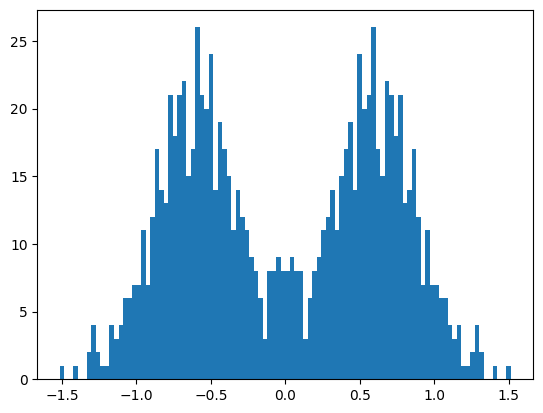

In [163]:
import matplotlib.pyplot as plt
plt.hist(opinions, bins=100)
plt.show()

In [164]:
agents = sim(agents, 2000)

iteration: 0. 100 iterations completed in: 0.3173341751098633 seconds


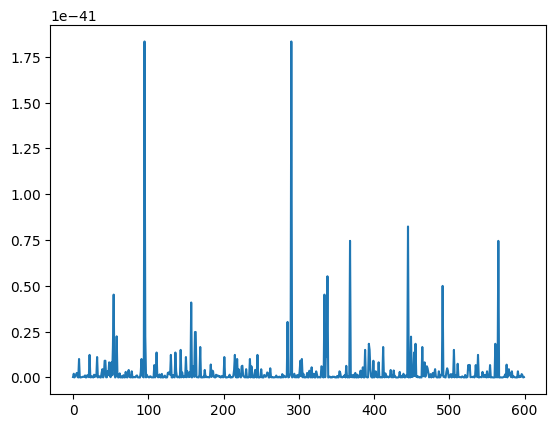

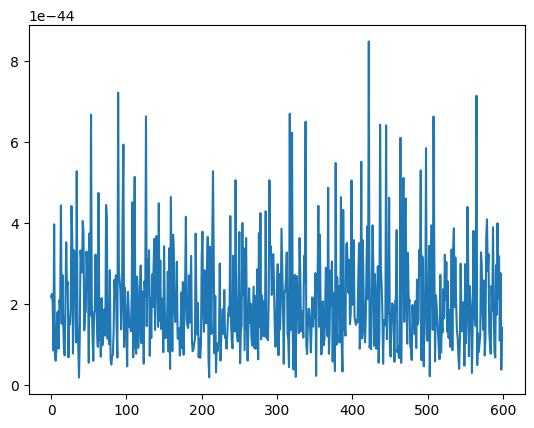

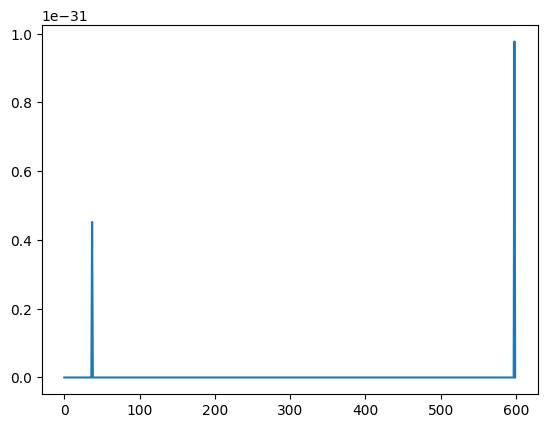

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


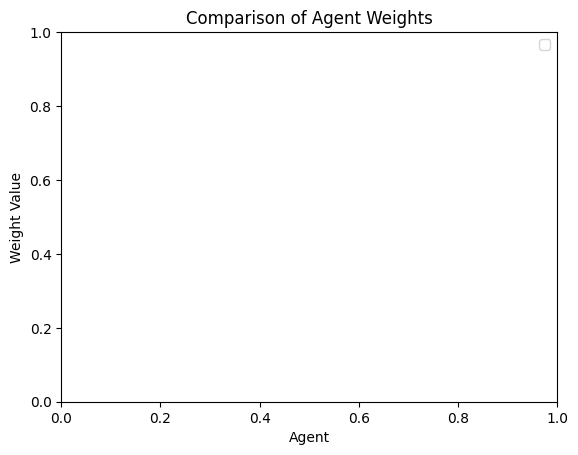

In [ ]:
# Extract weights for each agent
weights_per_agent = [agent.strategy_weights for agent in agents.values()]

# Transpose the list so that each weight index corresponds to one agent
weights_per_dimension = list(map(list, zip(*weights_per_agent)))

# Plot each dimension of weights for all agents
for i, weights in enumerate(weights_per_dimension):
    plt.plot(range(len(agents)), weights, label=f'Weight {i+1}')
    plt.show()

plt.xlabel('Agent')
plt.ylabel('Weight Value')
plt.title('Comparison of Agent Weights')
plt.legend()
plt.show()

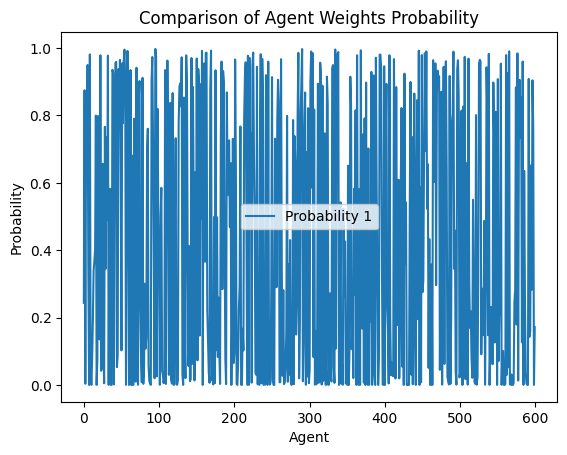

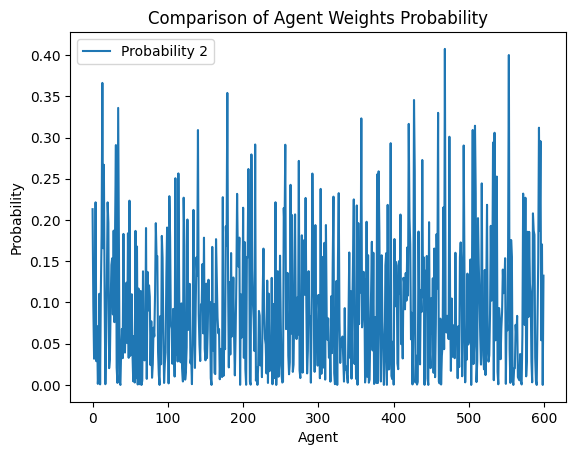

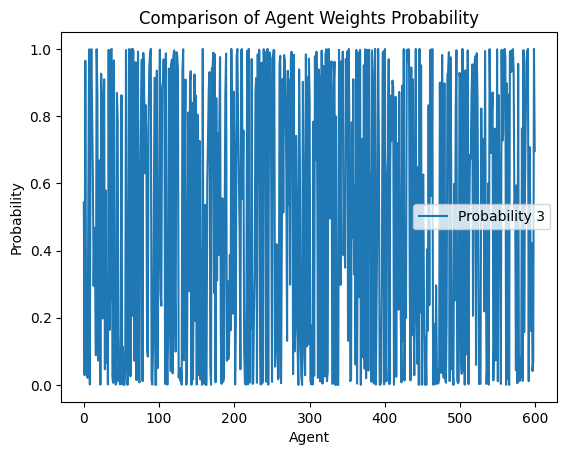

In [ ]:
probabilities_per_agent = []
for agent in agents.values():
    total_weight = sum(agent.strategy_weights)
    probabilities = [weight / total_weight for weight in agent.strategy_weights]
    probabilities_per_agent.append(probabilities)

# Transpose the list so that each probability index corresponds to one agent
probabilities_per_dimension = list(map(list, zip(*probabilities_per_agent)))

# Plot each dimension of probabilities for all agents
for i, probabilities in enumerate(probabilities_per_dimension):
    plt.plot(range(len(agents)), probabilities, label=f'Probability {i+1}')
    plt.xlabel('Agent')
    plt.ylabel('Probability')
    plt.title('Comparison of Agent Weights Probability')
    plt.legend()
    plt.show()


In [ ]:
# Threshold for probability
threshold = 0.5

# Count the number of agents with weight probability above the threshold for each weight
counts_above_threshold = [sum(1 for probability in probabilities if probability > threshold) for probabilities in probabilities_per_dimension]

print("Counts above threshold:", counts_above_threshold)

Counts above threshold: [253, 0, 307]


[0.74081822 0.62579333 0.4965853 ]


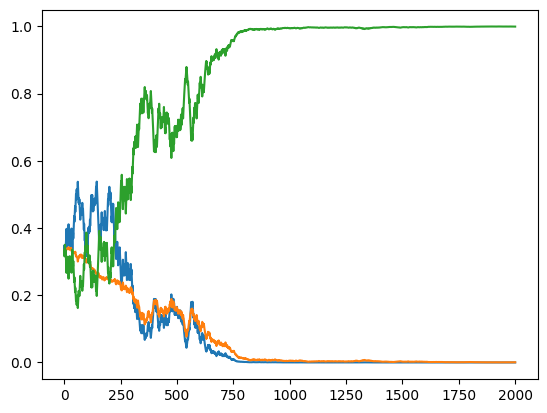

In [ ]:
weights = list(agents.values())[10].old_strategy_weights
print(weights[10])

def convert_weights_to_probabilities(low_w, med_w, high_w):
    total_weight = sum([low_w, med_w, high_w])
    return low_w / total_weight, med_w / total_weight, high_w / total_weight

low_probs = []
med_probs = []
high_probs = []
for low_w, med_w, high_w in weights:
    low_p, med_p, high_p = convert_weights_to_probabilities(low_w, med_w, high_w)
    low_probs.append(low_p)
    med_probs.append(med_p)
    high_probs.append(high_p)

plt.plot(low_probs, label='Low')
plt.plot(med_probs, label='Medium')
plt.plot(high_probs, label='High')
    
plt.show()
# med_probs

In [ ]:
for agent in agents.values():
    agent.update_agent_strat_prob_history()

# Sort agents by their opinions
sorted_agents = sorted(agents.items(), key=lambda x: x[1].opinions[0])
round_numbers = list(range(len(next(iter(agents.values())).old_strategy_weights)))  # Assuming all have the same round count

# # Creating matrices for low, medium, and high probabilities

low_matrix = [[strategy_prob[0] for strategy_prob in agent.agent_strat_prob_history] for _, agent in sorted_agents]
medium_matrix = [[strategy_prob[1] for strategy_prob in agent.agent_strat_prob_history] for _, agent in sorted_agents]
high_matrix = [[strategy_prob[2] for strategy_prob in agent.agent_strat_prob_history] for _, agent in sorted_agents]


In [ ]:
# import plotly.graph_objects as go

# # Function to create a 3D surface plot
# def create_3d_surface(z_data, title):
#     fig = go.Figure(data=[go.Surface(z=z_data, x=round_numbers, y=[agent[1].opinions[0] for agent in sorted_agents])])
#     fig.update_layout(title=title, autosize=True,
#                       scene=dict(
#                           xaxis_title='Round Number',
#                           yaxis_title='Agent Opinion',
#                           zaxis_title='Probability'
#                       ))
#     fig.show()

# # Creating surface plots for each strategy type
# create_3d_surface(low_matrix, 'Low Strategy Probability Surface')
# create_3d_surface(medium_matrix, 'Medium Strategy Probability Surface')
# create_3d_surface(high_matrix, 'High Strategy Probability Surface')


In [ ]:
for uuid, agent in sorted_agents:
    # opinions.append(agent.opinions[0])
    print(agent.agent_strat_prob_history[-1][0])

0.15991772457914116
0.09826001828571733
0.943109706120087
0.17893995275513802
0.014128386771287901
0.3382138810649567
0.9150431625252972
0.9085484785823642
0.9641287744517136
0.08738401179251433
0.15928512234789674
0.011090016609537819
0.380540306139141
0.9739706687303398
0.7797991752667152
0.9022829842014081
0.01918125410419993
0.08286026797738251
0.02020547228103228
0.4893000444959015
0.9728101660451212
0.4280505087071069
0.000901981430002312
0.011429609653229736
0.9116722982741058
0.7021005257019933
0.00027301531725513144
0.011074812501570103
0.06149633037905129
0.48716638694391196
0.0016050410953681847
0.7312110009459671
0.1349608257626203
0.9591761350046485
0.9541760362458888
0.28136325017652286
0.02334341382582722
0.0024334939025649036
0.8330837577732442
0.002953063309324163
0.051717634597928636
0.04478740210669591
0.029941780478501934
0.9537905432309592
0.035671296079740775
0.35987744566250623
0.9174067502686999
0.9111462058709039
0.8978290762809831
0.5858490556894169
0.94953057

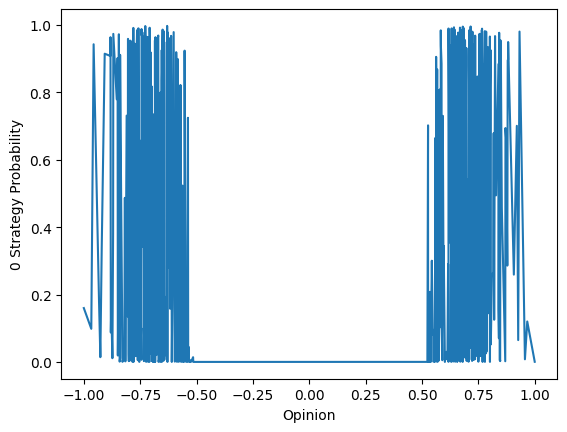

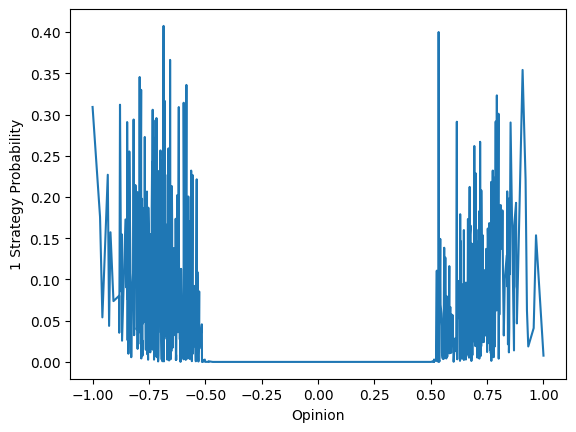

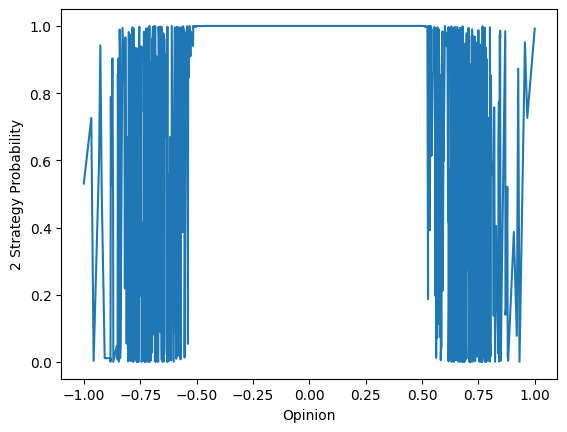

In [ ]:
for strat in [0, 1, 2]:
    opinions = []
    low_strat_prob = []
    for uuid, agent in sorted_agents:
        opinions.append(agent.opinions[0])
        low_strat_prob.append(agent.agent_strat_prob_history[-1][strat])
    plt.plot(opinions, low_strat_prob)
    plt.xlabel('Opinion')
    plt.ylabel(f'{strat} Strategy Probability')
    plt.show()
    


In [ ]:
def find_max_length_index_range(data, threshold, above_threshold=True):
    start_index = None
    max_range = (None, None)
    max_length = 0

    for i, value in enumerate(data):
        if (value > threshold if above_threshold else value < threshold):
            if start_index is None:
                start_index = i  # Start tracking a new range
        else:
            if start_index is not None:
                # Check the length of the current range
                current_length = i - start_index
                if current_length > max_length:
                    max_length = current_length
                    max_range = (start_index, i - 1)
                start_index = None  # Reset start index for the next potential range

    # Handle the case where the last values meet the condition and the range extends to the end of the data
    if start_index is not None:
        current_length = len(data) - start_index
        if current_length > max_length:
            max_range = (start_index, len(data) - 1)

    # If no valid range is found, return None
    if max_range[0] is None:
        return None

    return max_range

-0.5371811589329348 0.5238450540333529


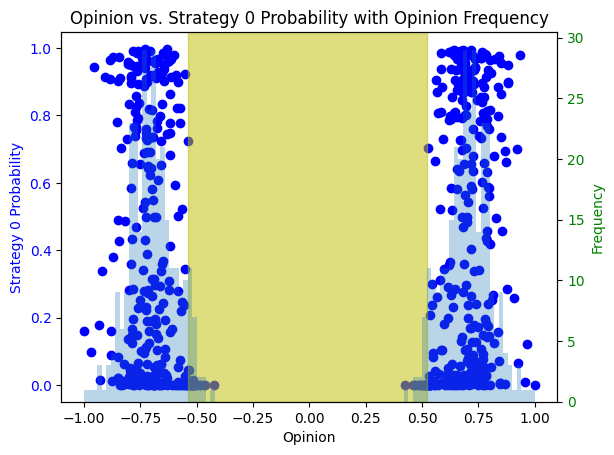

-0.5267946642891664 0.5238450540333529


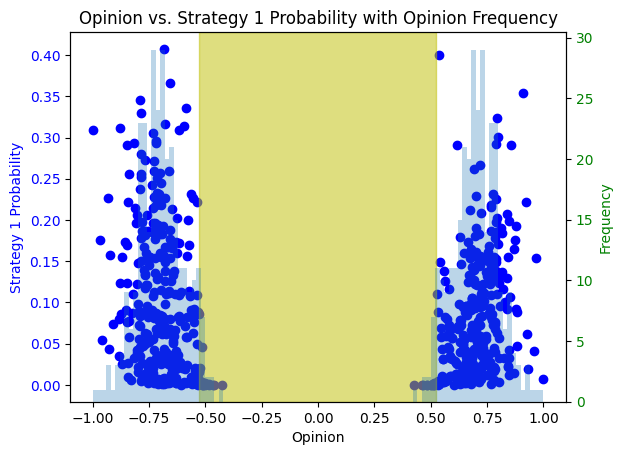

-0.5146868212882599 0.5238450540333529


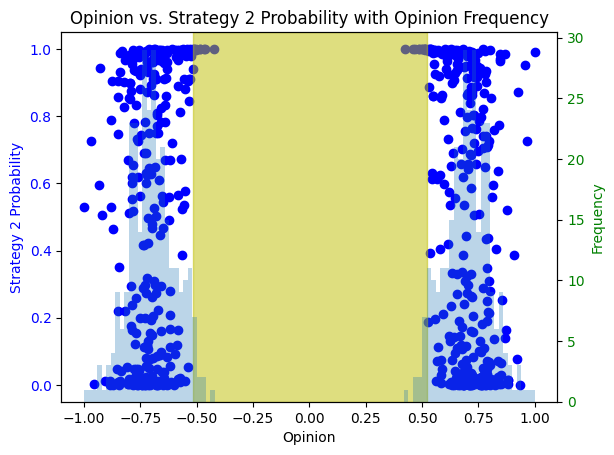

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

strat_to_threshold = {
    0: 0.05,
    1: 0.05,
    2: 0.95
}
# Assuming `sorted_agents` is a list of tuples and you have access to opinion and strategy probability data
for strat in [0, 1, 2]:  # For each strategy
    opinions = []
    strat_prob = []

    # Collect data for each agent
    for uuid, agent in sorted_agents:
        opinions.append(agent.opinions[0])
        strat_prob.append(agent.agent_strat_prob_history[-1][strat])

    # Create a plot with two y-axes
    fig, ax1 = plt.subplots()

    # Scatter plot on primary y-axis
    ax1.scatter(opinions, strat_prob, color='b')
    # Get range for which everyone is above the threshold
    above_threshold = strat_to_threshold[strat] > 0.5
    threshold_range = find_max_length_index_range(strat_prob, strat_to_threshold[strat], above_threshold)
    if threshold_range:
        print(opinions[threshold_range[0]], opinions[threshold_range[1]])
        ax1.axvspan(opinions[threshold_range[0]], opinions[threshold_range[1]], color='y', alpha=0.5)
    # ax1.axvline(x=0, color='r', linestyle='--')  # 'r' for red, '--' for dashed line style

    ax1.set_xlabel('Opinion')
    ax1.set_ylabel(f'Strategy {strat} Probability', color='b')
    
    # Create secondary y-axis for the histogram
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    ax2.hist(opinions, bins=np.arange(min(opinions), max(opinions) + 0.02, 0.02), alpha=0.3)
    ax2.set_ylabel('Frequency', color='g')

    # Change the tick color and label color to match the plots
    ax1.tick_params(axis='y', labelcolor='b')
    ax2.tick_params(axis='y', labelcolor='g')

    plt.title(f'Opinion vs. Strategy {strat} Probability with Opinion Frequency')
    plt.show()


### What we want to see: 
    1. We should be able to graph an agents strategy over time
    2. See how an agents strategy over time compares to their opinion.

### Things to play around with:
    1. The Learning Rate
    2. Distribution of agents opinions
        - Distribution of agent strategies (all in low tolerance? all in high tolerance?)
        - Start weights of doing high or low to be different. 
    3. Number of iterations
    4. Add in a network - What type of network is a good questions
    5. Changing opinions... 
    6. Q learning
    7. Add more opinions
    8. Compare loss of people in stable range and people outside the stable range.


<!-- -0.5755451960754527 0.5723270454092269 -->


